# Transaction Analysis

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Input file to be processed

In [2]:
# input full file path for the file to be processsed
file_path = input('Enter the file path:')

Enter the file path: C:/Users/Student/YUU-LearnToCode/DataAnalytics/week_8/Capstone_2/transaction_data.csv


In [3]:
# read file into notebook
with open(file_path, 'r') as file:
    print(file.read())

TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44,6,264,21.12,285.12
10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296,103.68,1399.68
10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50,12,600,48,648
10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36,2.88,38.88
10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,14.04,189.54
10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,2.98,40.18
10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai p

In [4]:
# import data from .CSV file
df = pd.read_csv('transaction_data.csv')

In [5]:
# review data
df

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,11016,20,4/10/2025,Anne Dodsworth,31,Gorgonzola Telino,14,Formaggi Fortini s.r.l.,12.5,15,187.5,15.00,202.50
1349,11016,20,4/10/2025,Anne Dodsworth,36,Inlagd Sill,17,Svensk Sjfda AB,19.0,16,304.0,24.32,328.32
1350,11058,82,4/29/2025,Anne Dodsworth,21,Sir Rodney's Scones,8,"Specialty Biscuits, Ltd.",10.0,3,30.0,2.40,32.40
1351,11058,82,4/29/2025,Anne Dodsworth,60,Camembert Pierrot,28,Gai pturage,34.0,21,714.0,57.12,771.12


In [6]:
# review info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1353 non-null   int64  
 1   CustID         1353 non-null   int64  
 2   Date           1353 non-null   object 
 3   Employee       1353 non-null   object 
 4   ProductID      1353 non-null   int64  
 5   ProductName    1353 non-null   object 
 6   VendorID       1353 non-null   int64  
 7   ProductVendor  1353 non-null   object 
 8   UnitPrice      1353 non-null   float64
 9   Quantity       1353 non-null   int64  
 10  Subtotal       1353 non-null   float64
 11  Tax(8%)        1353 non-null   float64
 12  OrderTotal     1353 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 137.5+ KB


After reviewing the data, I have determined some columns may not be necessary for analysis and the data must be broken up into multiple tables to avoid misleading analysis based on duplicates.

## Dataset normalization

In [7]:
# remove the column Tax(8%)
df = df.drop(columns=['Tax(8%)'])
df

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,648.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1348,11016,20,4/10/2025,Anne Dodsworth,31,Gorgonzola Telino,14,Formaggi Fortini s.r.l.,12.5,15,187.5,202.50
1349,11016,20,4/10/2025,Anne Dodsworth,36,Inlagd Sill,17,Svensk Sjfda AB,19.0,16,304.0,328.32
1350,11058,82,4/29/2025,Anne Dodsworth,21,Sir Rodney's Scones,8,"Specialty Biscuits, Ltd.",10.0,3,30.0,32.40
1351,11058,82,4/29/2025,Anne Dodsworth,60,Camembert Pierrot,28,Gai pturage,34.0,21,714.0,771.12


For my analysis I did not see a use for the 'Tax(8%)' column.

Next I will use the .groupby() method to group data together creating new DataFrames to pull insights from those DataFrames.

In [8]:
# create dataframe for sales data by Employee
dfE = df.groupby(['Employee']).sum(['Quantity', 'UnitPrice', 'OrderTotal'])
dfE

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,OrderTotal
Employee,,,,,,,,
Andrew Fuller,1554078,6516,5673,2079,4042.43,1829,49583.21,53549.87
Anne Dodsworth,665659,2646,2334,823,2038.56,822,25215.25,27232.47
Janet Leverling,2086955,8576,7923,2807,4833.81,2552,57347.97,61935.82
Laura Callahan,1828669,6503,7084,2439,4291.63,2250,57014.73,61575.87
Margaret Peacock,2815855,10395,10476,3848,7411.25,3308,94531.50,102093.97
Michael Suyama,1257471,5074,4833,1711,2737.12,1532,34899.51,37691.47
Nancy Davolio,2364681,5253,9287,3261,5765.38,2495,69532.81,75095.44
Robert King,1075497,4398,3977,1441,2374.41,1299,29596.60,31964.33
Steven Buchanan,775711,3328,3060,964,1560.15,1004,21377.75,23087.99


For this table I want specific insights of quantity sold, and revenue generated by employees so I will drop all but 2 columns here.

In [9]:
dfE = dfE.drop(columns=['TransactionID','CustID','ProductID', 'VendorID', 'Subtotal', 'UnitPrice'])
dfE

,Quantity,OrderTotal
Employee,,
Andrew Fuller,1829,53549.87
Anne Dodsworth,822,27232.47
Janet Leverling,2552,61935.82
Laura Callahan,2250,61575.87
Margaret Peacock,3308,102093.97
Michael Suyama,1532,37691.47
Nancy Davolio,2495,75095.44
Robert King,1299,31964.33
Steven Buchanan,1004,23087.99


Employee sales dataframe

In [10]:
# create dataframe for sales data by VendorID and ProductID
dfV = df.groupby(['VendorID', 'ProductID','ProductVendor', 'ProductName']).sum(['Quantity', 'UnitPrice', 'OrderTotal'])
dfV

TransactionID  \
VendorID ProductID ProductVendor              ProductName                                   
1        1         Exotic Liquids             Chai                                 277515   
         2         Exotic Liquids             Chang                                312283   
         3         Exotic Liquids             Aniseed Syrup                         64361   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning         127246   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix                52853   
...                                                                                   ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne                74941   
28       59        Gai pturage                Raclette Courdavault                 286295   
         60        Gai pturage                Camembert Pierrot                    288805   
29       61        Forts d'rables             Sirop d'rable                        172597   
         62        Forts d'rables             Tarte au sucre                       330347   

                                                                            CustID  \
VendorID ProductID ProductVendor              ProductName                            
1        1         Exotic Liquids             Chai                            1164   
         2         Exotic Liquids             Chang                            965   
         3         Exotic Liquids             Aniseed Syrup                    201   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning     450   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix           207   
...                                                                            ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne           246   
28       59        Gai pturage                Raclette Courdavault            1119   
         60        Gai pturage                Camembert Pierrot               1070   
29       61        Forts d'rables             Sirop d'rable                    739   
         62        Forts d'rables             Tarte au sucre                  1225   

                                                                            UnitPrice  \
VendorID ProductID ProductVendor              ProductName                               
1        1         Exotic Liquids             Chai                             439.20   
         2         Exotic Liquids             Chang                            532.00   
         3         Exotic Liquids             Aniseed Syrup                     58.00   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning     242.00   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix            98.05   
...                                                                               ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne            90.10   
28       59        Gai pturage                Raclette Courdavault            1375.00   
         60        Gai pturage                Camembert Pierrot                870.40   
29       61        Forts d'rables             Sirop d'rable                    450.30   
         62        Forts d'rables             Tarte au sucre                  1459.00   

                                                                            Quantity  \
VendorID ProductID ProductVendor              ProductName                              
1        1         Exotic Liquids             Chai                               313   
         2         Exotic Liquids             Chang                              407   
         3         Exotic Liquids             Aniseed Syrup                       84   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning       163   
         5         New Orleans Cajun Delights Chef Anton's Gu

In [11]:
# drop TransactionID and CustID
dfV = dfV.drop(columns=['TransactionID', 'CustID', 'UnitPrice'])
dfV

Quantity  \
VendorID ProductID ProductVendor              ProductName                              
1        1         Exotic Liquids             Chai                               313   
         2         Exotic Liquids             Chang                              407   
         3         Exotic Liquids             Aniseed Syrup                       84   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning       163   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix              71   
...                                                                              ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne              95   
28       59        Gai pturage                Raclette Courdavault               301   
         60        Gai pturage                Camembert Pierrot                  373   
29       61        Forts d'rables             Sirop d'rable                      187   
         62        Forts d'rables             Tarte au sucre                     372   

                                                                            Subtotal  \
VendorID ProductID ProductVendor              ProductName                              
1        1         Exotic Liquids             Chai                           5169.60   
         2         Exotic Liquids             Chang                          7425.20   
         3         Exotic Liquids             Aniseed Syrup                   800.00   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning   3198.80   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix         1376.65   
...                                                                              ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne         1219.00   
28       59        Gai pturage                Raclette Courdavault          15257.00   
         60        Gai pturage                Camembert Pierrot             11934.00   
29       61        Forts d'rables             Sirop d'rable                  5238.30   
         62        Forts d'rables             Tarte au sucre                17478.30   

                                                                            OrderTotal  
VendorID ProductID ProductVendor              ProductName                               
1        1         Exotic Liquids             Chai                             5583.17  
         2         Exotic Liquids             Chang                            8019.21  
         3         Exotic Liquids             Aniseed Syrup                     864.00  
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning     3454.70  
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix           1486.78  
...                                                                                ...  
27       58        Escargots Nouveaux         Escargots de Bourgogne           1316.52  
28       59        Gai pturage                Raclette Courdavault            16477.56  
         60        Gai pturage                Camembert Pierrot               12888.73  
29       61        Forts d'rables             Sirop d'rable                    5657.36  
         62        Forts d'rables             Tarte au sucre                  18876.56  

[77 rows x 3 columns]

Vendor sales dataframe

All DataFrames created dfE = by Employee, dfV = by Vendor

## Data Analysis

In [12]:
# sample top 10 rows
df.head(10)

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,648.00
5,10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36.0,38.88
6,10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,189.54
7,10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,40.18
8,10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,10,440.0,475.20
9,10304,4,9/12/2023,Nancy Davolio,71,Flotemysost,15,Norske Meierier,17.2,2,34.4,37.15


In [13]:
# statistical summary on dataset
df.describe()

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,OrderTotal
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,10661.179601,38.942350,40.389505,14.318551,25.908899,12.631929,324.537568,350.500540
std,243.094311,25.056615,22.277628,8.217175,28.613063,6.395421,403.982507,436.301107
min,10248.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.800000,5.180000
25%,10454.000000,17.000000,21.000000,7.000000,12.000000,7.000000,100.000000,108.000000
50%,10656.000000,35.000000,41.000000,14.000000,18.400000,12.000000,210.000000,226.800000
75%,10864.000000,60.000000,60.000000,21.000000,31.230000,20.000000,394.000000,425.520000
max,11077.000000,89.000000,77.000000,29.000000,263.500000,24.000000,4216.000000,4553.280000


According to the statistical summary above the average UnitPrice for all products sold here is 25.90 with an average of 350.50 in OrderTotal.
Based on the 'min' of 2.00, the 'max' of 263.50, and the standard deviation of 28.61 we can safley assume that although our UnitPrice has a wide range of different prices, our most expensive products are outliers compared to the other products sold. This also applies to OrderTotal as the standard deviation is slightly higher than the mean; when we review the 25th, median, and 75th percentiles we can safely assume that the revenue from a single order varies greatly with a few outliers.

In [14]:
# statistical summary on dataset for dtype = object
df.describe(include=object)

,Date,Employee,ProductName,ProductVendor
count,1353,1353,1353,1353
unique,450,9,77,29
top,5/6/2025,Margaret Peacock,Guaran Fantstica,Plutzer Lebensmittelgromrkte AG
freq,31,265,34,116


According to the statistical summary above this dataset contains 9 different employees, 77 different products, and 29 different vendors. Our top employee being Margaret Peacock, as well as our top product and vendor being Guaran Fantstica and Plutzer Lebensmittelgromrkte AG.

### Highest revenue and most products sold

In [15]:
# rank dfE
dfE.rank(ascending=False)

,Quantity,OrderTotal
Employee,,
Andrew Fuller,5.0,5.0
Anne Dodsworth,9.0,8.0
Janet Leverling,2.0,3.0
Laura Callahan,4.0,4.0
Margaret Peacock,1.0,1.0
Michael Suyama,6.0,6.0
Nancy Davolio,3.0,2.0
Robert King,7.0,7.0
Steven Buchanan,8.0,9.0


Using the .rank() method here allows me to quickly determine where all the employees rank for products sold and total revenue generated.

In [16]:
# rank dfV
product_rank = dfV.rank(ascending=False, method='min')
product_rank

Quantity  \
VendorID ProductID ProductVendor              ProductName                              
1        1         Exotic Liquids             Chai                              19.0   
         2         Exotic Liquids             Chang                              4.0   
         3         Exotic Liquids             Aniseed Syrup                     69.0   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning      51.0   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix            71.0   
...                                                                              ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne            66.0   
28       59        Gai pturage                Raclette Courdavault              23.0   
         60        Gai pturage                Camembert Pierrot                  6.0   
29       61        Forts d'rables             Sirop d'rable                     48.0   
         62        Forts d'rables             Tarte au sucre                     7.0   

                                                                            Subtotal  \
VendorID ProductID ProductVendor              ProductName                              
1        1         Exotic Liquids             Chai                              28.0   
         2         Exotic Liquids             Chang                             16.0   
         3         Exotic Liquids             Aniseed Syrup                     74.0   
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning      47.0   
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix            64.0   
...                                                                              ...   
27       58        Escargots Nouveaux         Escargots de Bourgogne            67.0   
28       59        Gai pturage                Raclette Courdavault               6.0   
         60        Gai pturage                Camembert Pierrot                 10.0   
29       61        Forts d'rables             Sirop d'rable                     27.0   
         62        Forts d'rables             Tarte au sucre                     3.0   

                                                                            OrderTotal  
VendorID ProductID ProductVendor              ProductName                               
1        1         Exotic Liquids             Chai                                28.0  
         2         Exotic Liquids             Chang                               16.0  
         3         Exotic Liquids             Aniseed Syrup                       74.0  
2        4         New Orleans Cajun Delights Chef Anton's Cajun Seasoning        47.0  
         5         New Orleans Cajun Delights Chef Anton's Gumbo Mix              64.0  
...                                                                                ...  
27       58        Escargots Nouveaux         Escargots de Bourgogne              67.0  
28       59        Gai pturage                Raclette Courdavault                 6.0  
         60        Gai pturage                Camembert Pierrot                   10.0  
29       61        Forts d'rables             Sirop d'rable                       27.0  
         62        Forts d'rables             Tarte au sucre                       3.0  

[77 rows x 3 columns]

In [17]:
# sort product rank df to determine highest grossing product
product_rank.sort_values('OrderTotal')

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductID,ProductVendor,ProductName,,,
12,29,Plutzer Lebensmittelgromrkte AG,Thringer Rostbratwurst,14.0,1.0,1.0
18,38,Aux joyeux ecclsiastiques,Cte de Blaye,57.0,2.0,2.0
29,62,Forts d'rables,Tarte au sucre,7.0,3.0,3.0
24,51,"G'day, Mate",Manjimup Dried Apples,16.0,4.0,4.0
26,56,Pasta Buttini s.r.l.,Gnocchi di nonna Alice,1.0,5.0,5.0
...,...,...,...,...,...,...
22,48,Zaanse Snoepfabriek,Chocolade,72.0,73.0,73.0
1,3,Exotic Liquids,Aniseed Syrup,69.0,74.0,74.0
15,33,Norske Meierier,Geitost,26.0,75.0,75.0


Our most popular product Gnocchi di nonna Alice ranked 5th in highest total revenue while Thringer Rostbratwurst, Cte de Blaye, and Manjimup Dried Apples our 1st, 2nd, and 4th highest grossing products didnt even rank in the top 10 in popularity.

In [18]:
# sort df to determine most expensive products
dfV.sort_values('OrderTotal', ascending=False)

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductID,ProductVendor,ProductName,,,
12,29,Plutzer Lebensmittelgromrkte AG,Thringer Rostbratwurst,324,36984.42,39943.16
18,38,Aux joyeux ecclsiastiques,Cte de Blaye,129,31356.50,33865.02
29,62,Forts d'rables,Tarte au sucre,372,17478.30,18876.56
24,51,"G'day, Mate",Manjimup Dried Apples,320,16313.40,17618.48
26,56,Pasta Buttini s.r.l.,Gnocchi di nonna Alice,454,16112.00,17400.96
...,...,...,...,...,...,...
22,48,Zaanse Snoepfabriek,Chocolade,68,828.75,895.05
1,3,Exotic Liquids,Aniseed Syrup,84,800.00,864.00
15,33,Norske Meierier,Geitost,286,663.00,716.04


When reviewing data from the previous DataFrame, this is just confirmation that Cte de Blaye is in fact our most expensive product and still produces the second highest revenue of all our products despite its high price.

In [19]:
# sort by Quantity to show most popular products
product_rank.sort_values('Quantity')

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductID,ProductVendor,ProductName,,,
26,56,Pasta Buttini s.r.l.,Gnocchi di nonna Alice,1.0,5.0,5.0
19,41,New England Seafood Cannery,Jack's New England Clam Chowder,2.0,41.0,41.0
10,24,Refrescos Americanas LTDA,Guaran Fantstica,3.0,60.0,60.0
1,2,Exotic Liquids,Chang,4.0,16.0,16.0
4,10,Tokyo Traders,Ikura,5.0,12.0,12.0
...,...,...,...,...,...,...
6,15,Mayumi's,Genen Shouyu,73.0,76.0,76.0
4,9,Tokyo Traders,Mishi Kobe Niku,74.0,40.0,40.0
2,66,New Orleans Cajun Delights,Louisiana Hot Spiced Okra,75.0,77.0,77.0


It seems as though our most popular products tend to be on the cheaper end while ultimely generating less revenue.

In [20]:
dfV.sort_values('Quantity', ascending=False)

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductID,ProductVendor,ProductName,,,
26,56,Pasta Buttini s.r.l.,Gnocchi di nonna Alice,454,16112.0,17400.96
19,41,New England Seafood Cannery,Jack's New England Clam Chowder,431,3946.6,4262.33
10,24,Refrescos Americanas LTDA,Guaran Fantstica,429,1818.0,1963.45
1,2,Exotic Liquids,Chang,407,7425.2,8019.21
4,10,Tokyo Traders,Ikura,381,11135.2,12026.02
...,...,...,...,...,...,...
6,15,Mayumi's,Genen Shouyu,47,651.0,703.08
4,9,Tokyo Traders,Mishi Kobe Niku,45,3977.0,4295.16
2,66,New Orleans Cajun Delights,Louisiana Hot Spiced Okra,39,629.0,679.32


In [21]:
# use .groupby() to determine the highest grossing vendor
vendor_rank = dfV.groupby(['VendorID', 'ProductVendor']).sum(['OrderTotal', 'Quantity'])
vendor_rank

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
1,Exotic Liquids,804,13394.80,14466.38
2,New Orleans Cajun Delights,595,11472.55,12390.34
3,Grandma Kelly's Homestead,396,12219.00,13196.52
4,Tokyo Traders,572,16400.20,17712.22
5,Cooperativa de Quesos 'Las Cabras',438,10434.80,11269.58
6,Mayumi's,573,6689.10,7224.23
7,"Pavlova, Ltd.",1150,36148.55,39040.42
8,"Specialty Biscuits, Ltd.",1004,20317.50,21942.87
9,PB Knckebrd AB,227,3180.60,3435.05


In [22]:
# sort by ordertotal
vendor_rank.sort_values('OrderTotal', ascending=False)

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1436,61810.37,66755.17
7,"Pavlova, Ltd.",1150,36148.55,39040.42
18,Aux joyeux ecclsiastiques,373,35474.90,38312.89
28,Gai pturage,674,27191.00,29366.29
24,"G'day, Mate",828,25071.60,27077.33
29,Forts d'rables,559,22716.60,24533.92
26,Pasta Buttini s.r.l.,690,20448.80,22084.71
8,"Specialty Biscuits, Ltd.",1004,20317.50,21942.87
20,Leka Trading,744,18829.20,20335.55


Here I want to determine which vendors bring in the most revenue.

In [23]:
# rank vendor revenue and quantity sold
vendor_rank.rank(ascending=False).sort_values('OrderTotal')

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1.0,1.0,1.0
7,"Pavlova, Ltd.",2.0,2.0,2.0
18,Aux joyeux ecclsiastiques,23.0,3.0,3.0
28,Gai pturage,11.0,4.0,4.0
24,"G'day, Mate",5.0,5.0,5.0
29,Forts d'rables,15.0,6.0,6.0
26,Pasta Buttini s.r.l.,9.0,7.0,7.0
8,"Specialty Biscuits, Ltd.",3.0,8.0,8.0
20,Leka Trading,8.0,9.0,9.0


In [24]:
# sort by quantity
vendor_rank.sort_values('Quantity', ascending=False)

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1436,61810.37,66755.17
7,"Pavlova, Ltd.",1150,36148.55,39040.42
8,"Specialty Biscuits, Ltd.",1004,20317.50,21942.87
15,Norske Meierier,846,15279.20,16501.53
24,"G'day, Mate",828,25071.60,27077.33
14,Formaggi Fortini s.r.l.,809,18580.40,20066.85
1,Exotic Liquids,804,13394.80,14466.38
20,Leka Trading,744,18829.20,20335.55
26,Pasta Buttini s.r.l.,690,20448.80,22084.71


In [25]:
vendor_rank.rank(ascending=False).sort_values('Quantity')

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1.0,1.0,1.0
7,"Pavlova, Ltd.",2.0,2.0,2.0
8,"Specialty Biscuits, Ltd.",3.0,8.0,8.0
15,Norske Meierier,4.0,12.0,12.0
24,"G'day, Mate",5.0,5.0,5.0
14,Formaggi Fortini s.r.l.,6.0,10.0,10.0
1,Exotic Liquids,7.0,13.0,13.0
20,Leka Trading,8.0,9.0,9.0
26,Pasta Buttini s.r.l.,9.0,7.0,7.0


## Data Visualization

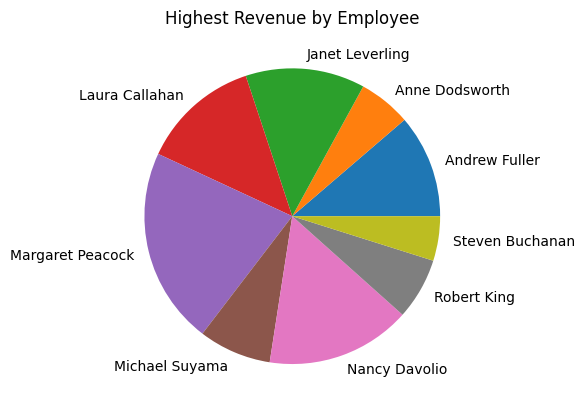

In [26]:
# create pie plot for dfE by ordertotal
dfE['OrderTotal'].plot(kind='pie')
# display the plot
plt.title('Highest Revenue by Employee')
plt.ylabel('')
plt.show()

Here is a pie chart to visually show just how much Margaret is outperforming her peers and Nancy as well but not nearly as much as Margaret.

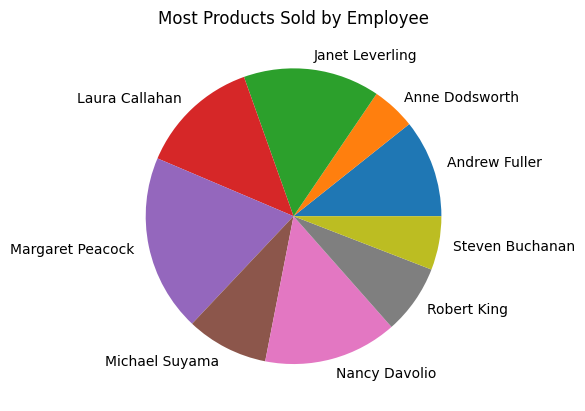

In [27]:
# create pie plot for dfE by quantity
dfE['Quantity'].plot(kind='pie')
# display the plot
plt.title('Most Products Sold by Employee')
plt.ylabel('')
plt.show()

Here is a pie chart for the most products sold and we see Margaret is outperforming her peers with Janet as a close 2nd and Nancy a close 3rd.

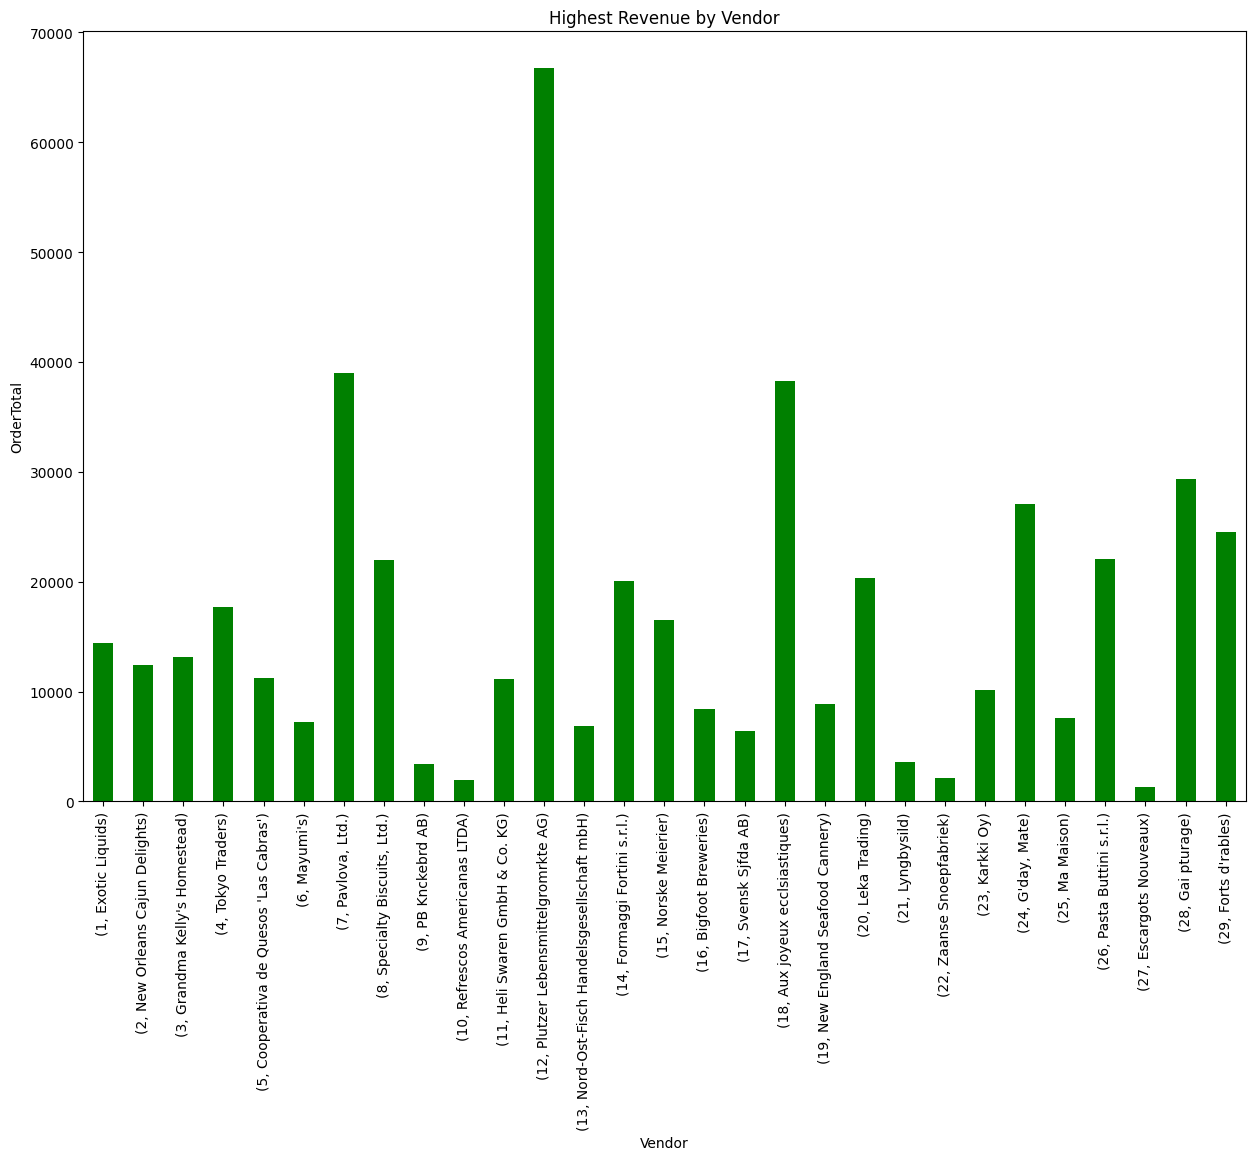

In [28]:
# create bar plot for highest grossing vendor
vendor_rank['OrderTotal'].plot(kind='bar', figsize=(15,10), color='g')
# display the plot
plt.title('Highest Revenue by Vendor')
plt.xlabel('Vendor')
plt.ylabel('OrderTotal')
plt.show()

Visualize the stark difference between our vendors with the highest total revenue compared to the others.